# Data Exploration - Santander Customer Transaction Prediction

In this notebook you can find a preliminary study for the [Santander Customer Transaction Prediction Challenge on Kaggle.com](https://www.kaggle.com/c/santander-customer-transaction-prediction)
![alt text](Kaggle.png)![alt text](im-wcsanusa-logo-7-19-18.png)

###### Description
At [Santander](https://www.santanderbank.com) our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

In [1]:
# Importing all the libraries needed
import os
from IPython.display import Image
Image("Kaggle.png") # same directory
Image("im-wcsanusa-logo-7-19-18.png") # same directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# getting my path C:\\Users\\username\\Desktop
# /Users/username/Desktop for Mac
path = os.getcwd()
# / if Mac \\ if Windows
path = '\\'.join(path.split("\\")[:4])

In [2]:
# reading the training set (train.csv), I had this file in C:\\Users\\username\\Desktop\\...
# / if Mac \\ if Windows
df_train = pd.read_csv(path + '\\Santander_Customer_Transaction_Prediction\\data\\train.csv')
df_test = pd.read_csv(path + '\\Santander_Customer_Transaction_Prediction\\data\\test.csv')

## Let's start exploring the Dataset!

In [3]:
# first records
df_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
# last records
df_train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [5]:
# here some info about our df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
# here a quick view of our df
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
# data types and df shape
print('Here are the data types:\n' + str(df_train.dtypes) + '\n')
print('This is the shape of our dataset:\n' + str(df_train.shape))

Here are the data types:
ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_19

In [8]:
# Finding the null values if present:
if True in list(df_train.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(df_train[df_train.columns[df_train.isnull().any()]].isnull().sum())
else:
    print('No null values in your Dataset!')

No null values in your Dataset!


In [9]:
# putting all the df colname in a list
dfcols = list(df_train.columns)

# exculdig target and index columns
variables = dfcols[2:]

# splitting the list every n elements:
n = 10
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

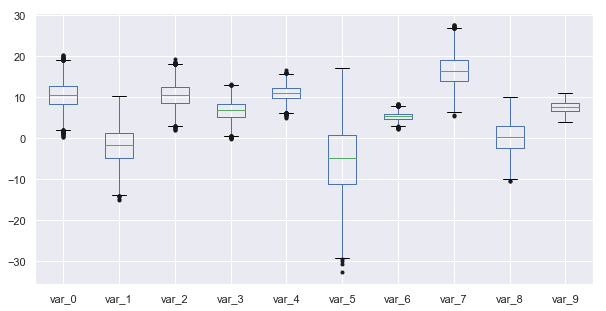

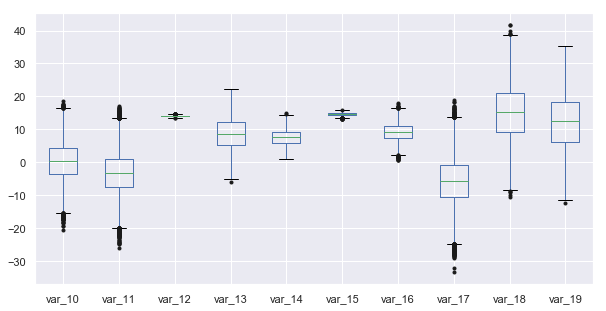

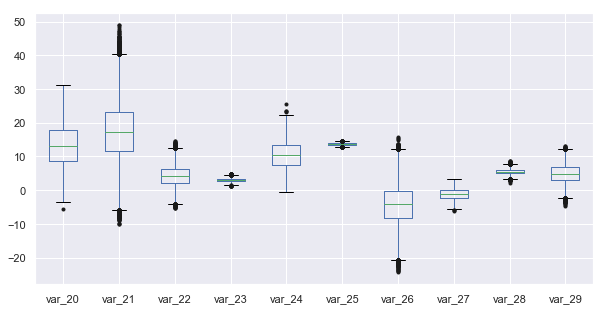

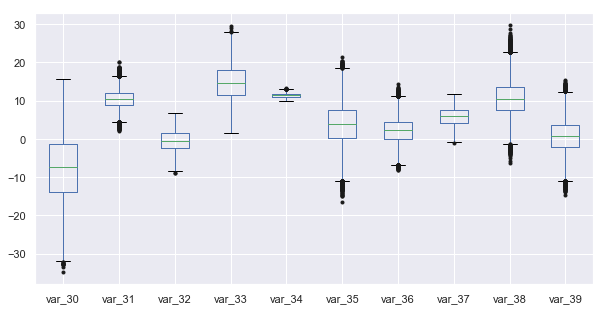

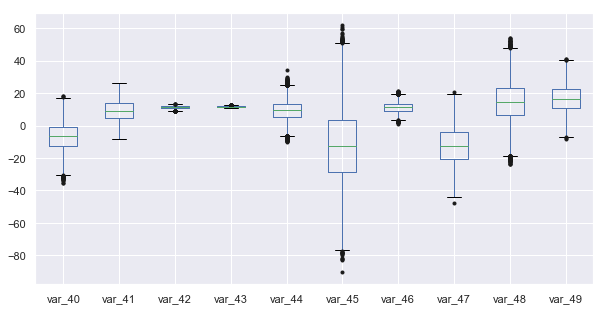

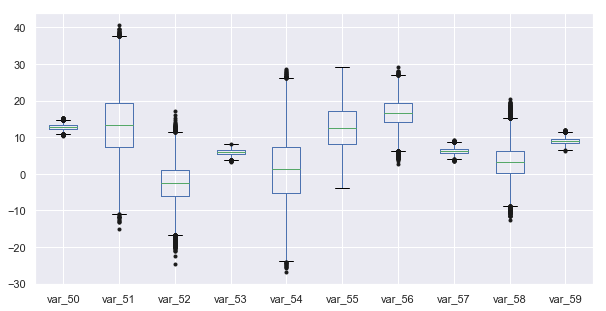

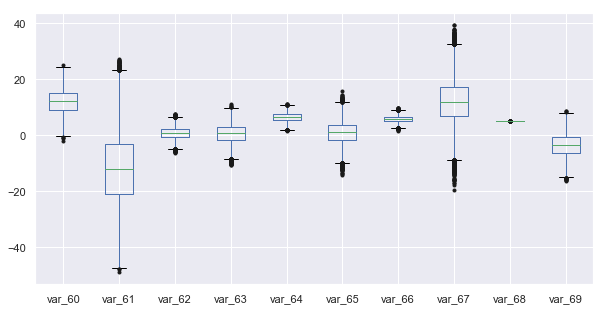

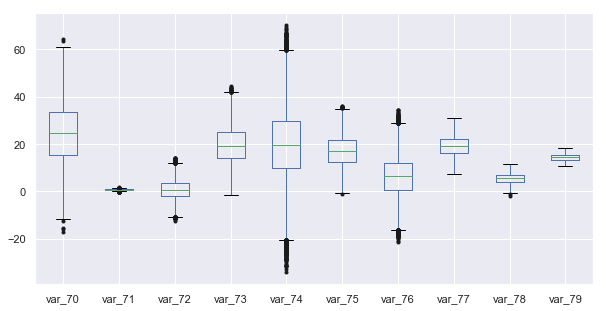

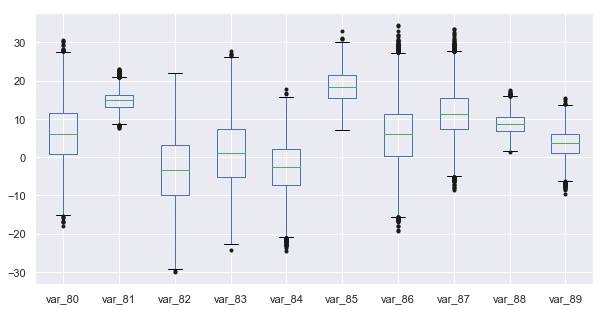

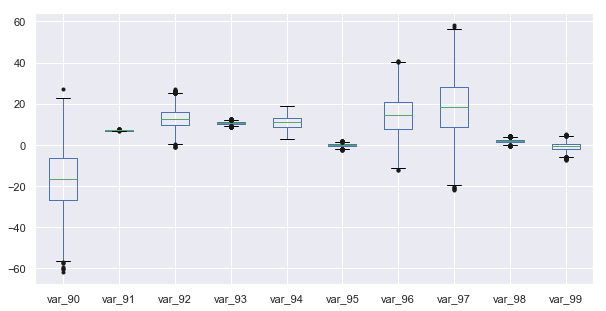

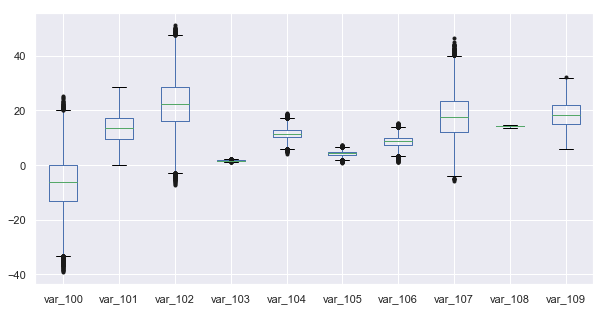

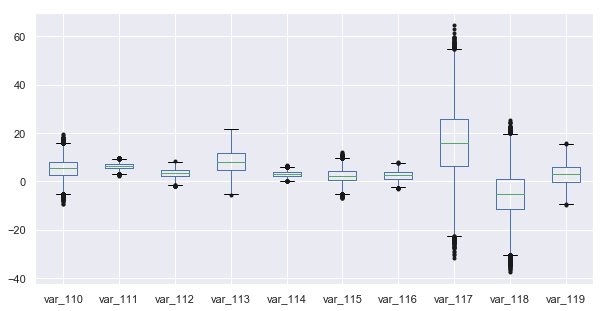

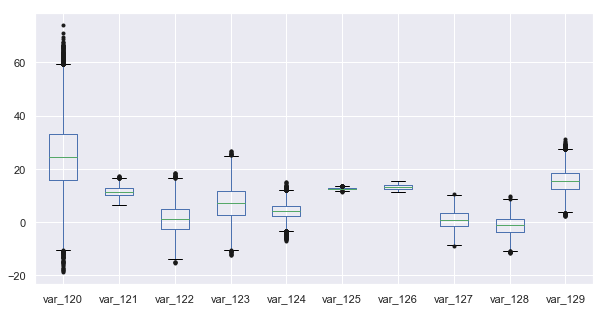

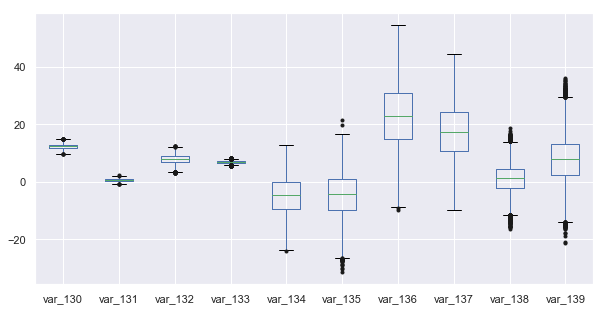

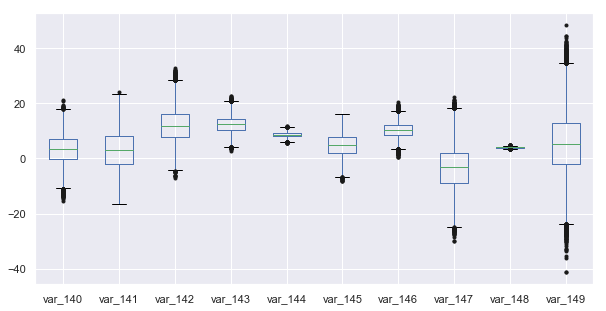

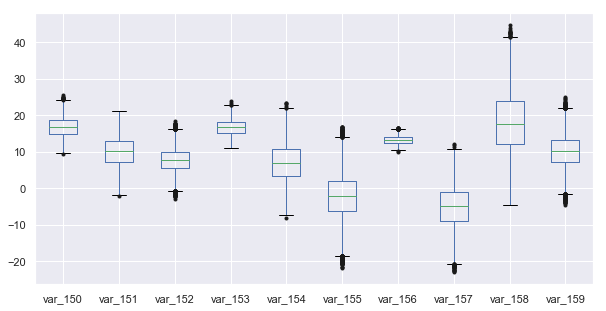

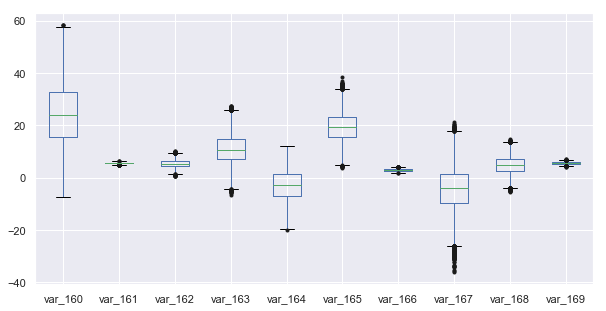

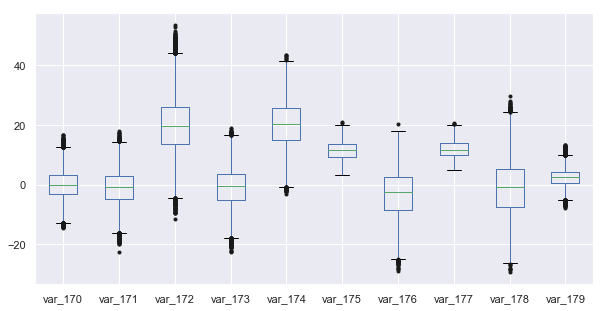

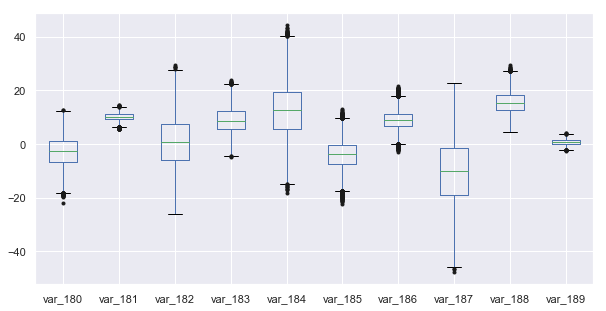

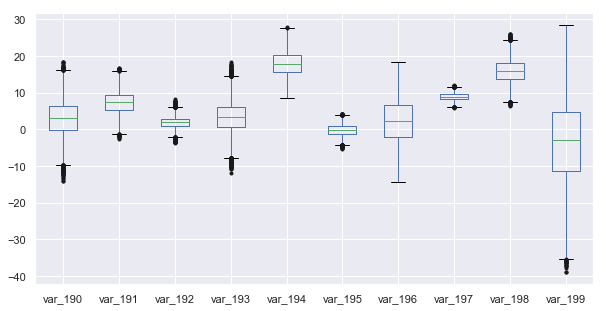

In [10]:
# displaying a boxplot every n columns:
for i in chunks:
    plt.show(df_train.boxplot(column = i, sym='k.', figsize=(10,5)))

## Let's look closer
###### Select an index from 0 to 199

In [11]:
# choose a column index
index = 85

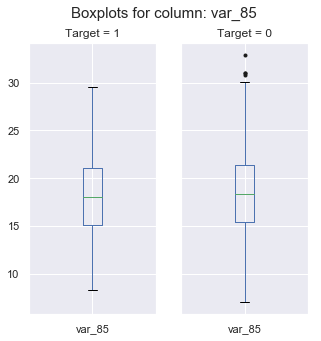

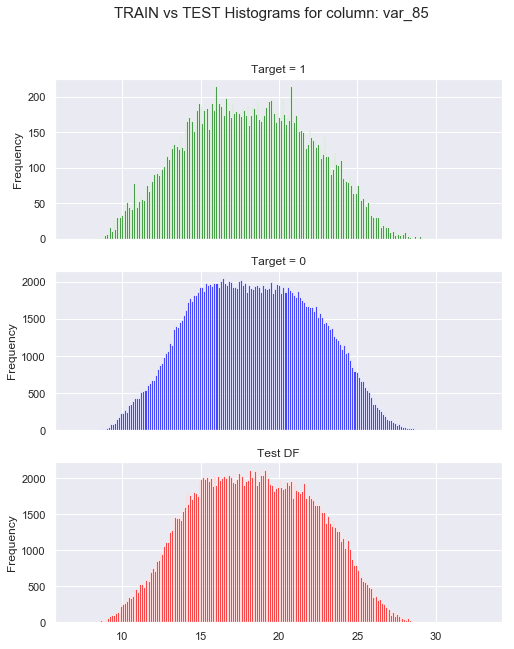

In [12]:
# displaying boxplots for the selected column:
fig1, axes1 = plt.subplots(ncols = 2, sharey = True, figsize=(5,5))

# boxplot only for records with target = 1
ax1 = df_train.loc[df_train["target"] == 1].boxplot(column = variables[index], ax=axes1[0], sym='k.')
ax1.set_title('Target = 1')

# boxplot only for records with target = 0
ax2 = df_train.loc[df_train["target"] == 0].boxplot(column = variables[index], ax=axes1[1], sym='k.')
ax2.set_title('Target = 0')

fig1.suptitle("Boxplots for column: " + str(variables[index]), fontsize=15)
plt.show()

#displaying histograms for the selected column:
fig2, axes2 = plt.subplots(nrows = 3, sharex = True, figsize=(8,10))

# boxplot only for records with target = 1
ax1 = df_train.loc[df_train["target"] == 1][variables[index]].plot.hist(ax=axes2[0], bins=200, color='green', alpha=0.7)
ax1.set_title('Target = 1')

# boxplot only for records with target = 0
ax2 = df_train.loc[df_train["target"] == 0][variables[index]].plot.hist(ax=axes2[1], bins=200, color='blue', alpha=0.7)
ax2.set_title('Target = 0')

#TEST DF
ax3 = df_test.loc[:][variables[index]].plot.hist(ax=axes2[2], bins=200, color='red', alpha=0.7)
ax3.set_title('Test DF')

fig2.suptitle("TRAIN vs TEST Histograms for column: " + str(variables[index]), fontsize=15)
plt.show()


## Is the Dataset balanced?
## How many 0 and 1 items there are?

In [13]:
mylst = list(df_train["target"].value_counts())
zero = round(float((mylst[0]/sum(mylst))*100),2)
one = round(float((mylst[1]/sum(mylst))*100),2)
print('The dataset has {zero} % of target 0 and {one} % of target 1'.format(zero=zero, one=one))

The dataset has 89.95 % of target 0 and 10.05 % of target 1


#### Well, not very balanced... we'll keep that into account!

## Let's see if there are some correlations between our variables

In [14]:
# choose a threshold to spot correlation above its abs()
# try 0.08 or 0.05 to have some results, even though is not a relevant correlation 
threshold = 0.3
dfcorr = df_train.corr()
dfcorr1 = dfcorr.copy()
dfcorr1[abs(dfcorr1) < threshold] = None
dfcorr1[abs(dfcorr1) >= threshold] = 1

In [15]:
# all the variables have at least corr = 1 with itself so we want to know
# which variables have more than 1 record above the threshold
cor = dfcorr1.sum(axis=1) > 1

In [16]:
# Listing the variables that is worth investigating on
var_to_check = list(cor[cor.values == True].index)

In [17]:
if len(var_to_check) > 0:
    print('These are the variables with correlations >= {}:'.format(threshold))
    print(str(var_to_check) + '\n')
    for i in var_to_check:
        print(str(dfcorr[(abs(dfcorr[i]) >= threshold) & (abs(dfcorr[i]) != 1)][i]) + '\n')
else:
    print('There are no significant correlations to look!')

There are no significant correlations to look!


In [18]:
dfcorr[(dfcorr!=1) & (abs(dfcorr)>0.1)].count()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

All the correlations are < |0.1| ... They are extremely uncorrelated. Maybe too much.
Maybe they performed PCA on this data before

------

#### What about duplicates?

In [19]:
df_train[df_train.loc[:,'var_0':].duplicated()]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [20]:
df_test[df_test.loc[:,'var_0':].duplicated()]

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


-----
### Sorting Fake Test Data
After a discussion on Kaggle. It seems that the test dataset was created with half real data (used for LB scores) and synthetic data (maybe to increase the diffuculty of the comp).

Here is the kernel: [List of Fake Samples and Public/Private LB split](https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split)

In [21]:
synthetic_samples_indexes = pd.read_csv('synthetic_samples_indexes.csv')
df_test_real = df_test[~df_test.index.isin(list(synthetic_samples_indexes['synthetic_samples_indexes']))]
df_test_real.shape

(100000, 201)

In [22]:
# This will generate 3 Histograms for every variable... it'will take a bit to run.

'''for i in range(0,200):
    #displaying histograms for the selected column:
    fig2, axes2 = plt.subplots(nrows = 3, sharex = True, figsize=(6,5))

    # boxplot only for records with target = 1
    ax1 = df_train.loc[df_train["target"] == 1][variables[i]].plot.hist(ax=axes2[0], bins=200, color='green', alpha=0.7)
    ax1.set_title('Target = 1')

    # boxplot only for records with target = 0
    ax2 = df_train.loc[df_train["target"] == 0][variables[i]].plot.hist(ax=axes2[1], bins=200, color='blue', alpha=0.7)
    ax2.set_title('Target = 0')

    #TEST DF
    ax3 = df_test_real.loc[:][variables[i]].plot.hist(ax=axes2[2], bins=200, color='red', alpha=0.7)
    ax3.set_title('Test DF')

    fig2.suptitle("TRAIN vs TEST Histograms for column: " + str(variables[i]), fontsize=15)
    plt.show()'''

'for i in range(0,200):\n    #displaying histograms for the selected column:\n    fig2, axes2 = plt.subplots(nrows = 3, sharex = True, figsize=(6,5))\n\n    # boxplot only for records with target = 1\n    ax1 = df_train.loc[df_train["target"] == 1][variables[i]].plot.hist(ax=axes2[0], bins=200, color=\'green\', alpha=0.7)\n    ax1.set_title(\'Target = 1\')\n\n    # boxplot only for records with target = 0\n    ax2 = df_train.loc[df_train["target"] == 0][variables[i]].plot.hist(ax=axes2[1], bins=200, color=\'blue\', alpha=0.7)\n    ax2.set_title(\'Target = 0\')\n\n    #TEST DF\n    ax3 = df_test_real.loc[:][variables[i]].plot.hist(ax=axes2[2], bins=200, color=\'red\', alpha=0.7)\n    ax3.set_title(\'Test DF\')\n\n    fig2.suptitle("TRAIN vs TEST Histograms for column: " + str(variables[i]), fontsize=15)\n    plt.show()'

The next steps are to go a bit deeper in analyzing and try also some FE (hoping will help the scores)

------

## The next part is still in progress :)

In [23]:
import time
import datetime
s = "01/01/1970 01-00-00"
time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y %H-%M-%S").timetuple())

0.0

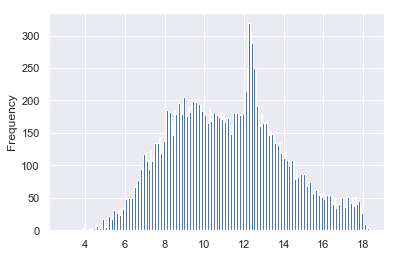

In [24]:
df_train[df_train['target']>0]['var_2'].plot.hist(bins=200)

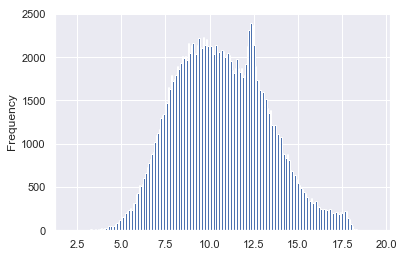

In [25]:
df_train[df_train['target']<1]['var_2'].plot.hist(bins=200)

In [26]:
df_train['var_108'].value_counts()

14.1999    313
14.2000    291
14.2003    255
14.2002    252
14.1997    250
14.1998    247
14.1996    245
14.2001    243
14.2004    234
14.1995    215
14.2007    211
14.2005    209
14.1994    204
14.2006    181
14.1993    156
14.2008    155
14.1991    143
14.1992    137
14.2009    137
14.1990    100
14.2010     99
14.1989     86
14.2011     86
14.1988     83
14.2012     77
14.3957     67
14.1987     65
14.2016     64
14.1238     63
14.1985     63
          ... 
14.6518      1
14.6235      1
14.5920      1
13.8586      1
14.6280      1
14.6374      1
14.6680      1
14.5872      1
14.6268      1
14.6045      1
14.5636      1
14.6029      1
14.6140      1
14.5783      1
13.8660      1
14.6092      1
14.5982      1
14.6151      1
14.5728      1
14.5946      1
14.5497      1
13.7726      1
14.6301      1
14.6394      1
14.6051      1
14.5869      1
13.8550      1
14.6449      1
14.6272      1
13.8326      1
Name: var_108, Length: 8525, dtype: int64

In [67]:
var68_0 = df_train[df_train['target']==0]['var_68'].value_counts()
var68_1 = df_train[df_train['target']==1]['var_68'].value_counts()

Variables to look closer:
- var_12
- var_16
- var_22
- var_32
- var_40
- var_53
- **var_68**
- var_78
- var_80
- var_81


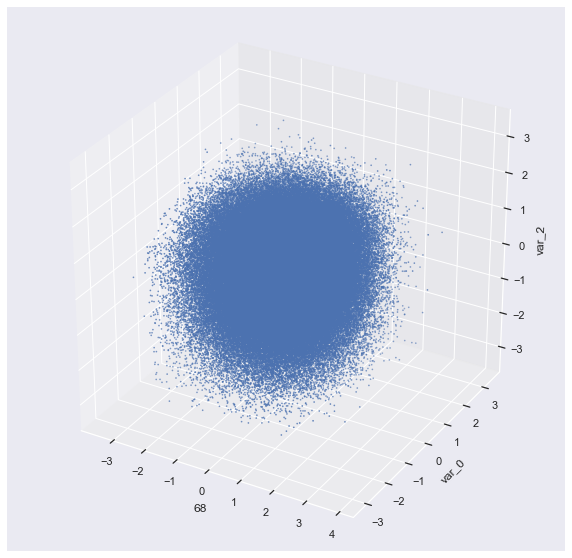

In [37]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train['var_68'].values, df_train['var_0'].values, df_train['var_2'].values, s=0.5)

ax.set_xlabel('68')
ax.set_ylabel('var_0')
ax.set_zlabel('var_2')

plt.show()

Text(0, 0.5, 'var_68')

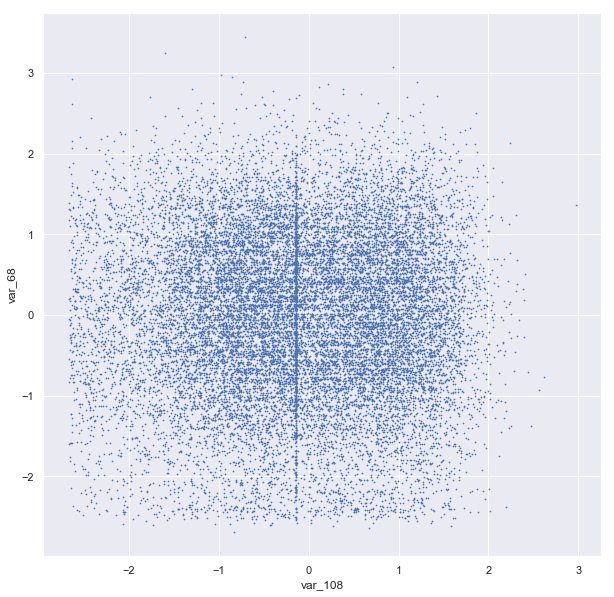

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_train[df_train['target']>0]['var_108'].values, df_train[df_train['target']>0]['var_68'].values, s=0.5)
ax.set_xlabel('var_108')
ax.set_ylabel('var_68')

### PDF Calculation

The functions above were shared in this [Kernel](https://www.kaggle.com/jiweiliu/fast-pdf-calculation-with-correlation-matrix)

They let you calculating Probability Density Functions (PDF) for our features in a fast way!

In [30]:
def logloss(y,yp):
    yp = np.clip(yp,1e-5,1-1e-5)
    return -y*np.log(yp)-(1-y)*np.log(1-yp)
    
def reverse(tr,te):
    reverse_list = [0,1,2,3,4,5,6,7,8,11,15,16,18,19,
                22,24,25,26,27,41,29,
                32,35,37,40,48,49,47,
                55,51,52,53,60,61,62,103,65,66,67,69,
                70,71,74,78,79,
                82,84,89,90,91,94,95,96,97,99,
                105,106,110,111,112,118,119,125,128,
                130,133,134,135,137,138,
                140,144,145,147,151,155,157,159,
                161,162,163,164,167,168,
                170,171,173,175,176,179,
                180,181,184,185,187,189,
                190,191,195,196,199]
    reverse_list = ['var_%d'%i for i in reverse_list]
    for col in reverse_list:
        tr[col] = tr[col]*(-1)
        te[col] = te[col]*(-1)
    return tr,te

def scale(tr,te):
    for col in tr.columns:
        if col.startswith('var_'):
            mean,std = tr[col].mean(),tr[col].std()
            tr[col] = (tr[col]-mean)/std
            te[col] = (te[col]-mean)/std
    return tr,te

def getp_vec_sum(x,x_sort,y,std,c=0.5):
    # x is sorted
    left = x - std/c
    right = x + std/c
    p_left = np.searchsorted(x_sort,left)
    p_right = np.searchsorted(x_sort,right)
    p_right[p_right>=y.shape[0]] = y.shape[0]-1
    p_left[p_left>=y.shape[0]] = y.shape[0]-1
    return (y[p_right]-y[p_left])

def get_pdf(tr,col,x_query=None,smooth=3):
    std = tr[col].std()
    df = tr.groupby(col).agg({'target':['sum','count']})
    cols = ['sum_y','count_y']
    df.columns = cols
    df = df.reset_index()
    df = df.sort_values(col)
    y,c = cols
    
    df[y] = df[y].cumsum()
    df[c] = df[c].cumsum()
    
    if x_query is None:
        rmin,rmax,res = -5.0, 5.0, 501
        x_query = np.linspace(rmin,rmax,res)
    
    dg = pd.DataFrame()
    tm = getp_vec_sum(x_query,df[col].values,df[y].values,std,c=smooth)
    cm = getp_vec_sum(x_query,df[col].values,df[c].values,std,c=smooth)+1
    dg['res'] = tm/cm
    dg.loc[cm<500,'res'] = 0.1
    return dg['res'].values

def get_pdfs(tr):
    y = []
    for i in range(200):
        name = 'var_%d'%i
        res = get_pdf(tr,name)
        y.append(res)
    return np.vstack(y)

def print_corr(corr_mat,col,bar=0.97):
    print(col)
    cols = corr_mat.loc[corr_mat[col]>bar,col].index.values
    cols_ = ['var_%s'%(i.split('_')[-1]) for i in cols]
    print(cols)
    return cols

In [31]:
tr,te = reverse(df_train,df_test_real)
tr,te = scale(tr,te)

C:\Users\FRaimondiCominesi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\FRaimondiCominesi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


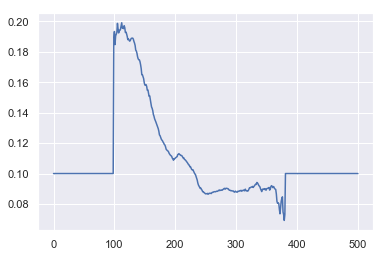

In [32]:
prob = get_pdf(tr,'var_2')
plt.plot(prob)

In [33]:
pdfs = get_pdfs(tr)

In [34]:
df_pdf = pd.DataFrame(pdfs.T,columns=['var_prob_%d'%i for i in range(200)])
corr_mat = df_pdf.corr(method='pearson')

In [35]:
corr_mat[corr_mat[(corr_mat.head() > 0.6) & (corr_mat.head() != 1)]['var_prob_12'] > 0]['var_prob_12']

var_prob_0    0.912165
var_prob_1    0.932628
var_prob_2    0.875644
var_prob_3    0.904677
var_prob_4    0.791243
Name: var_prob_12, dtype: float64

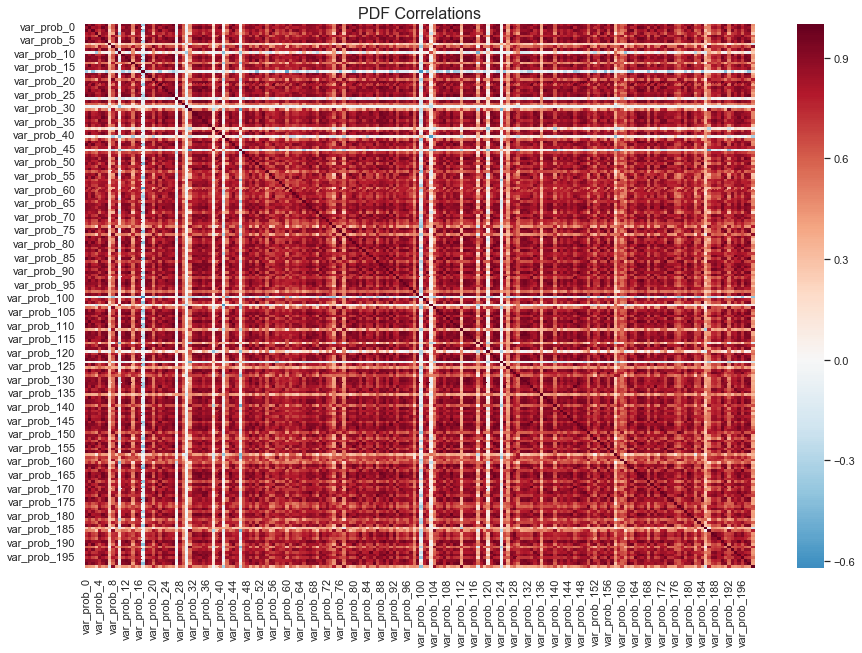

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, cmap='RdBu_r', center=0.0) 
plt.title('PDF Correlations',fontsize=16)
plt.show() 